#### Resouces : 
- https://www.kaggle.com/datasets/swapnilpanda/heart-sound-database  
After rescearch and asking doctors we found that this dataset belong to lung sound not heart sound. Ref: https://www.kaggle.com/code/israaelmorsy/lung-sound-classification/notebook
- https://www.kaggle.com/datasets/vbookshelf/respiratory-sound-database
- https://data.mendeley.com/datasets/jwyy9np4gv/3

#### I will find more data and update soon.

In [1]:
from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import os
import seaborn as sns
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(123)

## If error :
#### No module named 'numba.decorators'
- conda install -c numba numba
- conda install -c conda-forge librosa

#### cannot load library libsndfile64bit.dll 
- pip uninstall soundfile
- pip install soundfile

## Data from Kaggle - 1

In [4]:
audio_dir = 'Respiratory_Sound_Database/audio_and_txt_files'
wav_files = sorted([os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.wav')])

In [5]:
# min_duration = float('inf')
# for wav_file in wav_files:
#     samples, sample_rate = librosa.load(wav_file)
#     duration = librosa.get_duration(y=samples, sr=sample_rate)
#     if duration < min_duration:
#         min_duration = duration

# print('Minimum duration:', min_duration, 'seconds')

In [6]:
# directory = audio_dir
# count = 0

# for file in os.listdir(directory):
#     if file.endswith(".wav"):
#         count += 1

# print(f"Number of .wav files in directory: {count}")

In [7]:
# Set the target length for all audio files
target_length = 22050 * 10 # 5 seconds

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []

# Iterate over all the audio files
for wav_file in wav_files:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

# Convert the list to a numpy array and add a channel dimension
X_train = np.array(all_mfccs)
X_train = np.expand_dims(X_train, axis=-1)

# Print the shape of the numpy array
print(X_train.shape)


(920, 20, 431, 1)


In [8]:
# n_mels = 128
# max_sec = 5

# all_mel_spec = []
# for wav_file in wav_files:
#     samples, sample_rate = librosa.load(wav_file, duration=max_sec)
#     mel_spec = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=n_mels)
#     log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#     all_mel_spec.append(log_mel_spec)

# X_train = np.array(all_mel_spec)
# X_train = np.expand_dims(X_train, axis=-1)

# X_train.shape

In [9]:
# n_mels = 128
# max_sec = 5

# all_mel_spec = []
# for wav_file in wav_files:
#     # Load the audio file
#     samples, sample_rate = librosa.load(wav_file)
    
#     # Check if the duration is less than max_sec
#     if librosa.get_duration(y=samples, sr=sample_rate) < max_sec:
#         # Calculate the stretch factor needed to make the duration equal to max_sec
#         stretch_factor = max_sec / librosa.get_duration(y=samples, sr=sample_rate)
        
#         # Apply time stretching to the audio
#         stretched_audio = librosa.effects.time_stretch(samples, stretch_factor)
        
#         # Add the stretched audio to the all_mel_spec list
#         mel_spec = librosa.feature.melspectrogram(y=stretched_audio, sr=sample_rate, n_mels=n_mels)
#         log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#         all_mel_spec.append(log_mel_spec)
#     else:
#         # Add the original audio to the all_mel_spec list
#         samples = samples[:int(max_sec * sample_rate)]
#         mel_spec = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=n_mels)
#         log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#         all_mel_spec.append(log_mel_spec)

# # Concatenate the mel spectrograms
# X_train = np.concatenate(all_mel_spec, axis=1)
# X_train = np.expand_dims(X_train, axis=-1)

# X_train.shape


In [10]:
# assert False, "Stopping the execution here"

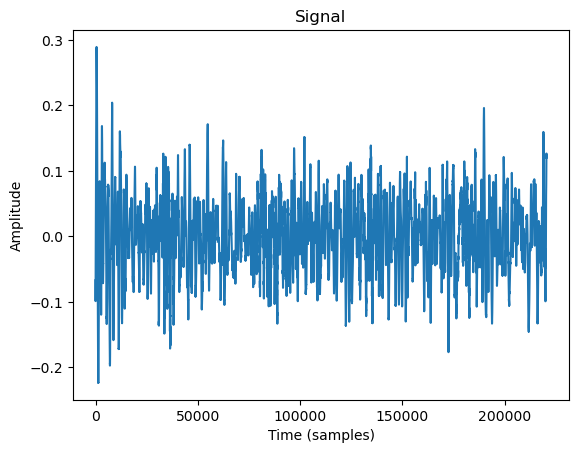

In [11]:
plt.plot(samples);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

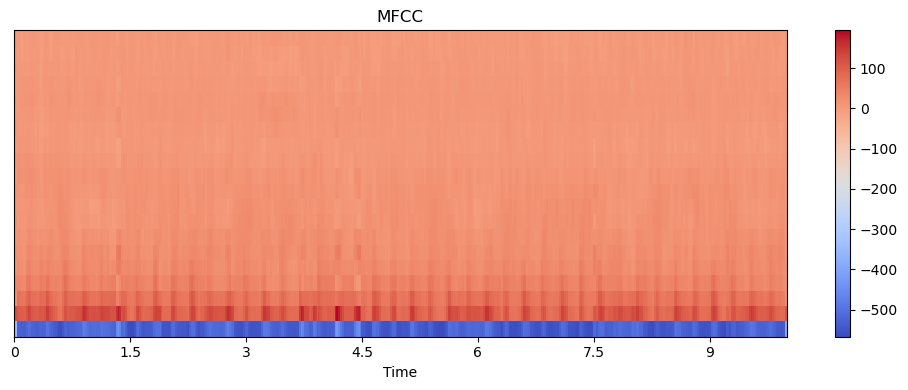

In [12]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(all_mfccs[0], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

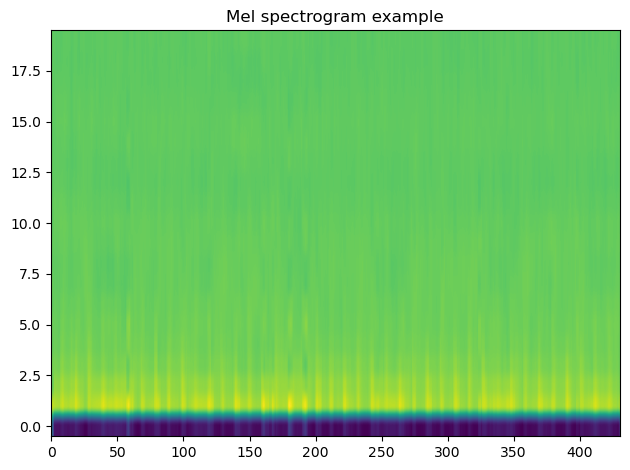

In [13]:
mel_spec = X_train[0, :, :, 0]
plt.imshow(mel_spec, aspect='auto', origin='lower')
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [14]:
y_train = pd.read_csv("Respiratory_Sound_Database/patient_diagnosis.csv" ,  header=None)
y_train = y_train.rename(columns={0: "id", 1: "type"})
y_train['type'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: type, dtype: int64

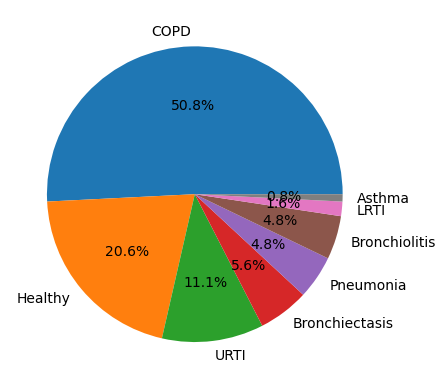

In [15]:
counts =y_train["type"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

In [16]:
y_train.loc[y_train['type'] != 'Healthy', 'type'] = 'Unhealthy'
y_train

,id,type
0,101,Unhealthy
1,102,Healthy
2,103,Unhealthy
3,104,Unhealthy
4,105,Unhealthy
...,...,...
121,222,Unhealthy
122,223,Unhealthy
123,224,Healthy
124,225,Healthy


In [17]:
y_train["type"].value_counts()

Unhealthy    100
Healthy       26
Name: type, dtype: int64

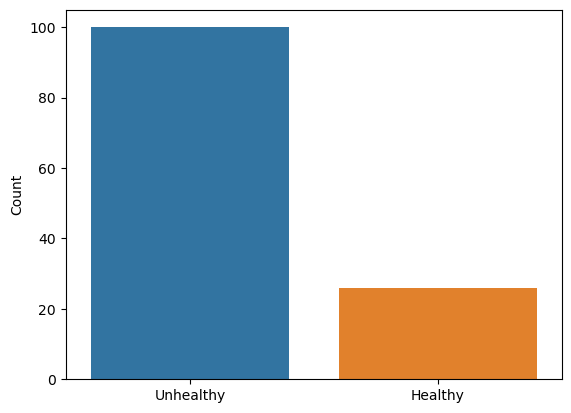

In [18]:
counts =y_train["type"].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

In [19]:
patient_ids = [int(f.split("_")[0]) for f in os.listdir(audio_dir) if f.endswith(".wav")]
patient_ids.sort()
new_y_train = pd.DataFrame({'id': patient_ids})
for i, pid in enumerate(patient_ids):
    match = y_train['id'] == pid
    if match.any():
        new_y_train.at[i, 'type'] = y_train[match]['type'].values[0]
    else:
        new_y_train.at[i, 'type'] = 'Unknown'
new_y_train

,id,type
0,101,Unhealthy
1,101,Unhealthy
2,102,Healthy
3,103,Unhealthy
4,104,Unhealthy
...,...,...
915,224,Healthy
916,225,Healthy
917,226,Unhealthy
918,226,Unhealthy


In [20]:
new_y_train["type"].value_counts()

Unhealthy    885
Healthy       35
Name: type, dtype: int64

In [21]:
y_train = new_y_train
y_train = y_train.drop("id", axis=1)
y_train

,type
0,Unhealthy
1,Unhealthy
2,Healthy
3,Unhealthy
4,Unhealthy
...,...
915,Healthy
916,Healthy
917,Unhealthy
918,Unhealthy


In [22]:
y_train['type'].value_counts()

Unhealthy    885
Healthy       35
Name: type, dtype: int64

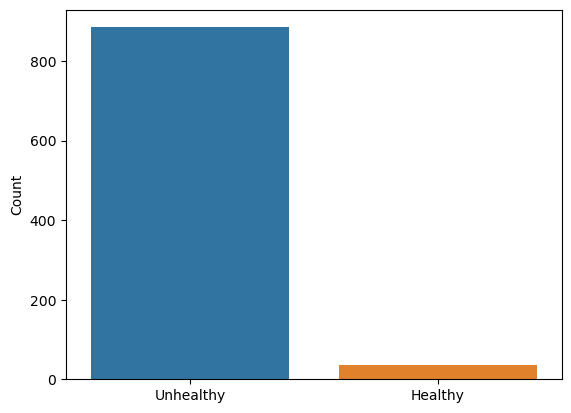

In [23]:
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

## Data from Kaggle - 2

### Healthy Data

In [24]:
# assert False, "Stopping the execution here"

In [25]:
audio_dir_1 = 'heart_sound/train/healthy'
audio_dir_2 = 'heart_sound/val/healthy'

wav_files_1 = sorted([os.path.join(audio_dir_1, f) for f in os.listdir(audio_dir_1) if f.endswith('.wav')])
wav_files_2 = sorted([os.path.join(audio_dir_2, f) for f in os.listdir(audio_dir_2) if f.endswith('.wav')])

In [26]:
# min_duration = float('inf')

# for wav_file in (wav_files_1 + wav_files_2):
#     samples, sample_rate = librosa.load(wav_file)
#     duration = librosa.get_duration(y=samples, sr=sample_rate)
#     if duration < min_duration:
#         min_duration = duration

# print('Minimum duration:', min_duration, 'seconds')

In [27]:
directory = audio_dir_1
count = 0

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1

directory = audio_dir_2

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1
print(f"Number of .wav files in directory: {count}")

Number of .wav files in directory: 2725


In [28]:
# n_mels = 128
# max_sec = 5

# all_mel_spec = []
# for wav_file in wav_files_1 + wav_files_2:
#     samples, sample_rate = librosa.load(wav_file, duration=max_sec)
#     mel_spec = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=n_mels)
#     log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#     all_mel_spec.append(log_mel_spec)

# X_train_2 = np.array(all_mel_spec)
# X_train_2 = np.expand_dims(X_train_2, axis=-1)

# X_train_2.shape

In [29]:
# Set the target length for all audio files
target_length = 22050 * 10 # 5 seconds

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []

# Iterate over all the audio files
for wav_file in wav_files_1 + wav_files_2:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

# Convert the list to a numpy array and add a channel dimension
X_train_2 = np.array(all_mfccs)
X_train_2 = np.expand_dims(X_train_2, axis=-1)

# Print the shape of the numpy array
print(X_train_2.shape)

(2725, 20, 431, 1)


In [30]:
# new_data = np.ones(X_train.shape)
X_train = np.concatenate([X_train, X_train_2], axis=0)
X_train.shape

(3645, 20, 431, 1)

In [31]:
y_2 = pd.DataFrame({'type': ['Healthy'] * count})
y_2

,type
0,Healthy
1,Healthy
2,Healthy
3,Healthy
4,Healthy
...,...
2720,Healthy
2721,Healthy
2722,Healthy
2723,Healthy


In [32]:
y_train

,type
0,Unhealthy
1,Unhealthy
2,Healthy
3,Unhealthy
4,Unhealthy
...,...
915,Healthy
916,Healthy
917,Unhealthy
918,Unhealthy


In [33]:
y_train = pd.concat([y_train, y_2], ignore_index=False)
y_train.shape

(3645, 1)

In [34]:
# counts = y_train["type"].value_counts()
# plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
# plt.show()

### Unhealthy Data

In [35]:
audio_dir_3 = 'heart_sound/train/unhealthy'
audio_dir_4 = 'heart_sound/val/unhealthy'

wav_files_3 = sorted([os.path.join(audio_dir_3, f) for f in os.listdir(audio_dir_3) if f.endswith('.wav')])
wav_files_4 = sorted([os.path.join(audio_dir_4, f) for f in os.listdir(audio_dir_4) if f.endswith('.wav')])

In [36]:
directory = audio_dir_3
count = 0

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1

directory = audio_dir_4

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1
print(f"Number of .wav files in directory: {count}")

Number of .wav files in directory: 816


In [37]:
# min_duration = float('inf')

# for wav_file in (wav_files_3 + wav_files_4):
#     samples, sample_rate = librosa.load(wav_file)
#     duration = librosa.get_duration(y=samples, sr=sample_rate)
#     if duration < min_duration:
#         min_duration = duration

# print('Minimum duration:', min_duration, 'seconds')

In [38]:
# n_mels = 128
# max_sec = 5

# all_mel_spec = []
# for wav_file in wav_files_3 + wav_files_4:
#     samples, sample_rate = librosa.load(wav_file, duration=max_sec)
#     mel_spec = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=n_mels)
#     log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#     all_mel_spec.append(log_mel_spec)

# X_train_3 = np.array(all_mel_spec)
# X_train_3 = np.expand_dims(X_train_3, axis=-1)

# X_train_3.shape

In [39]:
# Set the target length for all audio files
target_length = 22050 * 10 # 5 seconds

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []

# Iterate over all the audio files
for wav_file in wav_files_3 + wav_files_4:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

# Convert the list to a numpy array and add a channel dimension
X_train_3 = np.array(all_mfccs)
X_train_3 = np.expand_dims(X_train_3, axis=-1)

# Print the shape of the numpy array
print(X_train_3.shape)


(816, 20, 431, 1)


In [40]:
X_train = np.concatenate([X_train, X_train_3], axis=0)
X_train.shape

(4461, 20, 431, 1)

In [41]:
y_3 = pd.DataFrame({'type': ['Unhealthy'] * count})
y_3

,type
0,Unhealthy
1,Unhealthy
2,Unhealthy
3,Unhealthy
4,Unhealthy
...,...
811,Unhealthy
812,Unhealthy
813,Unhealthy
814,Unhealthy


In [42]:
y_train = pd.concat([y_train, y_3], ignore_index=False)
y_train.shape

(4461, 1)

In [43]:
y_train.value_counts()

type     
Healthy      2760
Unhealthy    1701
dtype: int64

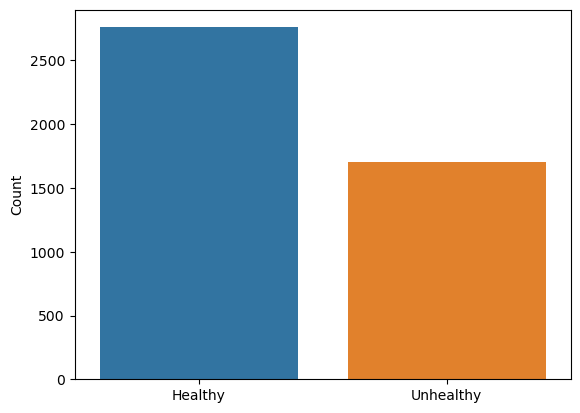

In [44]:
# count the values in the 'Category' column
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

## Data from data.mendeley - 3

In [45]:
audio_dir_5 = 'jwyy9np4gv-3/Audio Files'
wav_files_5 = sorted([os.path.join(audio_dir_5, f) for f in os.listdir(audio_dir_5) if f.endswith('.wav')])

In [46]:
# n_mels = 128
# max_sec = 5

# all_mel_spec = []
# for wav_file in wav_files_5:
#     samples, sample_rate = librosa.load(wav_file, duration=max_sec)
#     mel_spec = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=n_mels)
#     log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#     all_mel_spec.append(log_mel_spec)

# X_train_4 = np.array(all_mel_spec)
# X_train_4 = np.expand_dims(X_train_4, axis=-1)

# X_train_4.shape

In [47]:
# Set the target length for all audio files
target_length = 22050 * 10 # 5 seconds

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []

# Iterate over all the audio files
for wav_file in wav_files_5:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

# Convert the list to a numpy array and add a channel dimension
X_train_4 = np.array(all_mfccs)
X_train_4 = np.expand_dims(X_train_4, axis=-1)

# Print the shape of the numpy array
print(X_train_4.shape)

(336, 20, 431, 1)


In [48]:
# new_data = np.ones(X_train.shape)
X_train = np.concatenate([X_train, X_train_4], axis=0)
X_train.shape

(4797, 20, 431, 1)

In [49]:
data = []

for file in wav_files_5:
    # Split the file name to get the data after "_"
    data_after_underscore = file.split('_')[1]
    # Remove the file extension
    data_after_underscore = data_after_underscore.split('.')[0]
    
    data_after_underscore = data_after_underscore.split(",")[0]
        
    data.append(data_after_underscore)

# Create a DataFrame from the data
y_4= pd.concat([pd.DataFrame(data, columns=['type'])])

# Print the DataFrame
y_4.value_counts()

type                          
N                                 105
Asthma                             51
asthma                             45
heart failure                      45
COPD                               24
pneumonia                          15
Lung Fibrosis                      12
BRON                                9
Heart Failure                       9
Heart Failure + COPD                6
Plueral Effusion                    6
Asthma and lung fibrosis            3
Heart Failure + Lung Fibrosis       3
copd                                3
dtype: int64

In [50]:
y_4.loc[y_4['type'] == 'N', 'type'] = 'Healthy'
y_4.loc[y_4['type'] != 'Healthy', 'type'] = 'Unhealthy'
y_4.value_counts()

type     
Unhealthy    231
Healthy      105
dtype: int64

In [51]:
y_train = pd.concat([y_train, y_4], ignore_index=False)
y_train.shape

(4797, 1)

In [52]:
y_train['type'].value_counts()

Healthy      2865
Unhealthy    1932
Name: type, dtype: int64

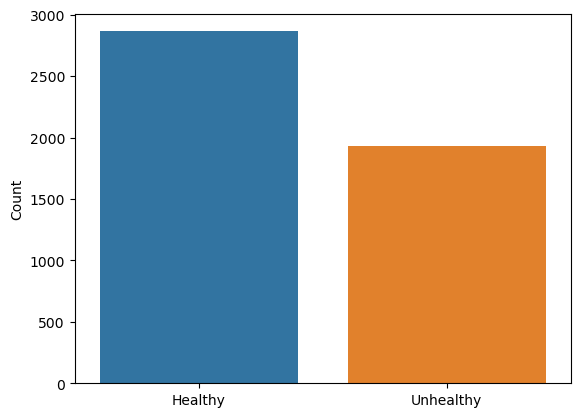

In [53]:
# count the values in the 'Category' column
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

### Stop

In [54]:
# assert False, "Stopping the execution here"

In [55]:
y_train["type"] = np.where(y_train["type"] == "Healthy", 0, 1)

In [56]:
y_train = to_categorical(y_train, 2)
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [57]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [475]:
#Reset train Data
X_train = X_train_copy.copy()
y_train = y_train_copy.copy()

In [476]:
def apply_spec_augment(spectrogram, freq_mask_length=2, time_mask_length=5):
#     f = np.random.randint(low=0, high=spectrogram.shape[0] - freq_mask_length)
#     spectrogram[f:f+freq_mask_length, :] = 0

    t = np.random.randint(low=0, high=spectrogram.shape[1] - time_mask_length)
    spectrogram[:, t:t+time_mask_length] = 0
    
    t = np.random.randint(low=0, high=spectrogram.shape[1] - time_mask_length)
    spectrogram[:, t:t+time_mask_length] = 0
    
    t = np.random.randint(low=0, high=spectrogram.shape[1] - time_mask_length)
    spectrogram[:, t:t+time_mask_length] = 0

    t = np.random.randint(low=0, high=spectrogram.shape[1] - time_mask_length)
    spectrogram[:, t:t+time_mask_length] = 0
    
    return spectrogram

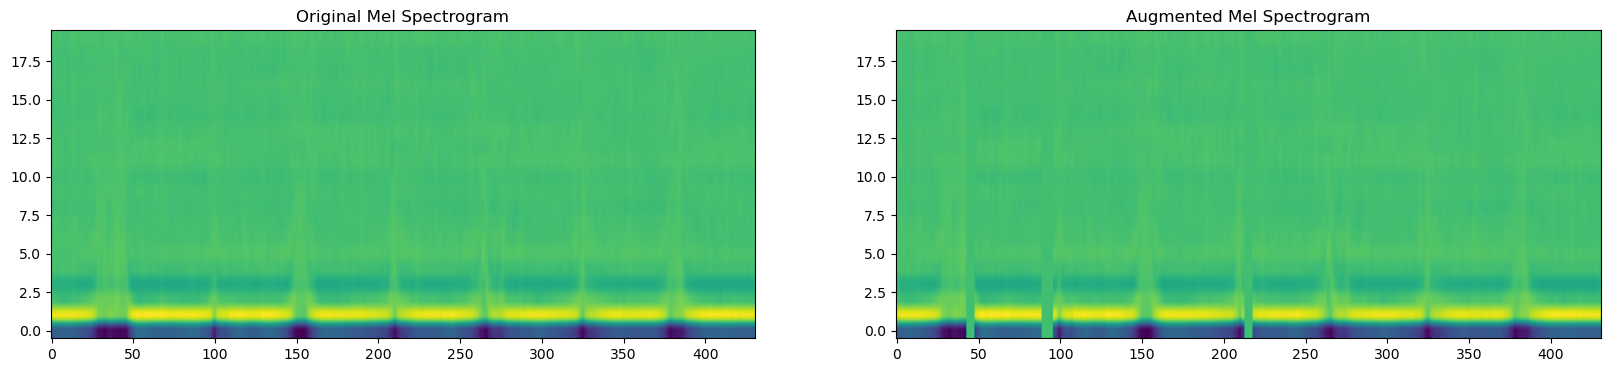

In [477]:
spec_orig = X_train[10, :, :, 0].copy()


fig, axs = plt.subplots(1, 2, figsize=(20, 4))

axs[0].imshow(spec_orig, aspect='auto', origin='lower')
axs[0].set_title('Original Mel Spectrogram')

spec_aug = apply_spec_augment(spec_orig.copy())
axs[1].imshow(spec_aug, aspect='auto', origin='lower')
axs[1].set_title('Augmented Mel Spectrogram')

plt.show()

In [478]:
indices = np.random.permutation(len(X_train))

# Shuffle arrays using random indices
X_train = X_train[indices]
y_train = y_train[indices]

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.18, stratify=y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)
X_train.shape , y_train.shape , X_val.shape, y_val.shape , X_test.shape, y_test.shape

((3146, 20, 431, 1),
 (3146, 2),
 (787, 20, 431, 1),
 (787, 2),
 (864, 20, 431, 1),
 (864, 2))

In [480]:
X_train_aug = []
y_train_aug = []

for i in range(X_train.shape[0]):
    spectrogram = X_train[i, :, :, 0]
    for j in range(1):
        augmented_spectrogram = apply_spec_augment(spectrogram)
        X_train_aug.append(augmented_spectrogram[:, :, np.newaxis])
        y_train_aug.append(y_train[i])

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

print("Original X_train shape:", X_train.shape)
print("Augmented X_train shape:", X_train_aug.shape)
print("Original y_train shape:", y_train.shape)
print("Augmented y_train shape:", y_train_aug.shape)

Original X_train shape: (3146, 20, 431, 1)
Augmented X_train shape: (3146, 20, 431, 1)
Original y_train shape: (3146, 2)
Augmented y_train shape: (3146, 2)


In [481]:
# Concatenate original data with augmented data
X_train= np.concatenate((X_train, X_train_aug), axis=0)
y_train = np.concatenate((y_train, y_train_aug), axis=0)

print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)

Final X_train shape: (6292, 20, 431, 1)
Final y_train shape: (6292, 2)


In [482]:
indices = np.random.permutation(len(X_train))

# Shuffle arrays using random indices
X_train = X_train[indices]
y_train = y_train[indices]

In [507]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization
from sklearn.metrics import classification_report , confusion_matrix ,ConfusionMatrixDisplay

In [518]:
#The top-performing convolutional neural network structure (Accuracy > 0.93)
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [520]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
50/50 [==============================] - 59s 1s/step - loss: 4.0145 - accuracy: 0.5488 - val_loss: 0.6601 - val_accuracy: 0.5972
Epoch 2/20
50/50 [==============================] - 58s 1s/step - loss: 0.6346 - accuracy: 0.6265 - val_loss: 0.6174 - val_accuracy: 0.5972
Epoch 3/20
50/50 [==============================] - 60s 1s/step - loss: 0.6131 - accuracy: 0.6678 - val_loss: 0.6027 - val_accuracy: 0.7408
Epoch 4/20
50/50 [==============================] - 59s 1s/step - loss: 0.5762 - accuracy: 0.6580 - val_loss: 0.5573 - val_accuracy: 0.7903
Epoch 5/20
50/50 [==============================] - 59s 1s/step - loss: 0.5122 - accuracy: 0.6866 - val_loss: 0.4647 - val_accuracy: 0.7598
Epoch 6/20
50/50 [==============================] - 59s 1s/step - loss: 0.4823 - accuracy: 0.7360 - val_loss: 0.4584 - val_accuracy: 0.7497
Epoch 7/20
50/50 [==============================] - 59s 1s/step - loss: 0.4780 - accuracy: 0.7343 - val_loss: 0.4687 - val_accuracy: 0.7433
Epoch 8/20
50/50 [==

In [ ]:
score = model.evaluate(X_test,y_test)
print("accuracy : " + str(score[1] * 100) )

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15,5))

ax1.set_title('Loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'val'], loc='upper right')


ax2.set_title('Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['train', 'val'], loc='lower right')

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_true, y_pred_classes) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Healthy" , "Unhealthy"])
disp.plot(cmap='Blues')
disp.ax_.set(xlabel='Predictions', ylabel='Actuals')

In [ ]:
print(classification_report(y_true , y_pred_classes, target_names=["Healthy" , "Unhealthy"]))

#### Let's try with Data from youtube video

In [ ]:
audio_dir_yt_1 = 'LungDataset/Healthy'
audio_dir_yt_2 = 'LungDataset/Unhealthy'

wav_files_yt_1 = sorted([os.path.join(audio_dir_yt_1, f) for f in os.listdir(audio_dir_yt_1) if f.endswith('.wav')])
wav_files_yt_2 = sorted([os.path.join(audio_dir_yt_2, f) for f in os.listdir(audio_dir_yt_2) if f.endswith('.wav')])

In [ ]:
# Set the target length for all audio files
target_length = 22050 * 10 # 5 seconds

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []
data_predict = []
i=0
# Iterate over all the audio files
for wav_file in wav_files_yt_1 + wav_files_yt_2:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)
    data_predict.append([wav_file.split("/")[2]])
    if wav_file in wav_files_yt_1:
        data_predict[i].append("Healthy")
    else : 
        data_predict[i].append("Unhealthy")
    i += 1

# Convert the list to a numpy array and add a channel dimension
X_yt = np.array(all_mfccs)
X_yt = np.expand_dims(X_yt, axis=-1)

# Print the shape of the numpy array
print(X_yt.shape)

In [ ]:
y_pred = model.predict(X_yt)
y_pred_classes = np.argmax(y_pred, axis = 1)
i = 0
for pred in y_pred_classes:
    if pred == 0:
        data_predict[i].append("Healthy")
    else:
        data_predict[i].append("Unhealthy")
    i += 1
data_predict

In [ ]:
predict_table=pd.DataFrame(data_predict, columns=['file_name','true','predict'])
predict_table

In [ ]:
for i in range(X_yt.shape[0]):
    spectrogram = X_yt[i, :, :, 0]
    for j in range(1):
        apply_spec_augment(spectrogram)

In [ ]:
y_pred = model.predict(X_yt)
y_pred

In [ ]:
model_predict=[]
y_pred = model.predict(X_yt)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_pred_classes

In [ ]:
model_predict

In [ ]:
mel_spec = X_yt[11, :, :, 0]

plt.imshow(mel_spec, aspect='auto', origin='lower')
plt.title('Mel spectrogram example')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()



In [ ]:
mel_spec = X_yt[1, :, :, 0]

plt.imshow(mel_spec, aspect='auto', origin='lower')
plt.title('Mel spectrogram example')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [ ]:
model_predict = []
for pred in y_pred_classes:
    if pred == 0:
        model_predict.append("Healthy")
    else:
        model_predict.append("Unhealthy")

In [ ]:
model_predict

In [ ]:
# n_mels = 128
# max_sec = 5

# all_mel_spec = []
# for wav_file in wav_files:
#     samples, sample_rate = librosa.load(wav_file)
#     samples_concat = np.tile(samples, 2)  # repeat the audio file twice to exceed max_sec
#     mel_spec = librosa.feature.melspectrogram(y=samples_concat, sr=sample_rate, n_mels=n_mels)
#     log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#     all_mel_spec.append(log_mel_spec)

# X_train = np.array(all_mel_spec)
# X_train = np.expand_dims(X_train, axis=-1)

# X_train.shape


In [ ]:
# import librosa
# import numpy as np
# import os

# audio_dir = 'Respiratory_Sound_Database/audio_and_txt_files'
# wav_files = sorted([os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.wav')])

# n_mels = 128
# max_sec = 5

# all_mel_spec = []
# for wav_file in wav_files:
#     duration = librosa.get_duration(filename=wav_file)
#     if duration < max_sec:
#         # Load the audio and repeat it until it's longer than max_sec
#         samples, sample_rate = librosa.load(wav_file, sr=None)
#         while len(samples) < max_sec * sample_rate:
#             samples = np.concatenate((samples, samples))
#         samples = samples[:max_sec * sample_rate]
#     else:
#         # Load only the first max_sec seconds of the audio
#         samples, sample_rate = librosa.load(wav_file, duration=max_sec)
#     # Compute the mel spectrogram
#     mel_spec = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=n_mels)
#     log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#     all_mel_spec.append(log_mel_spec)

# X_train = np.array(all_mel_spec)
# X_train = np.expand_dims(X_train, axis=-1)

# X_train.shape
